Did countries with a high anxiety rate also have a high depression rate? Or DId larger population size correlate to higher prevalence of disorders?

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import json
import requests


In [2]:
mental_health_df = pd.read_csv('Resources/clean_data.csv')
mental_health_df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
0,0.0,Afghanistan,AFG,1990.0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,318435.8137,12412000.0
1,1.0,Afghanistan,AFG,1991.0,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,329044.7740,13299000.0
2,2.0,Afghanistan,AFG,1992.0,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,382544.5729,14486000.0
3,3.0,Afghanistan,AFG,1993.0,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,440381.5074,15817000.0
4,4.0,Afghanistan,AFG,1994.0,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,456916.6455,17076000.0


In [3]:
mental_health_df.dropna(axis = 0, how = 'any', inplace = True)

In [4]:
country_list = mental_health_df['Entity'].unique()
country_list
len(country_list)

196

In [5]:
country_codes = mental_health_df['Code'].unique()
country_codes


array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB',
       'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ',
       'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LTU', 'LUX', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI',
       'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG', 'MNE',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER',
       'NGA', 'PRK',

In [6]:
anx_depr_df = mental_health_df[['Entity', 'Code', 'Year', 'Anxiety disorders (%)', 'Depression (%)', 'Population']]
anx_depr_df = anx_depr_df.loc[anx_depr_df['Year'] > 2012]
anx_depr_df.dropna(axis = 0, how = 'any', inplace = True)


In [7]:
#create a scattter plot of anxiety versus depression rates

def regression_plot(x_values, y_values):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show


The r-squared is: 0.3504648902382383


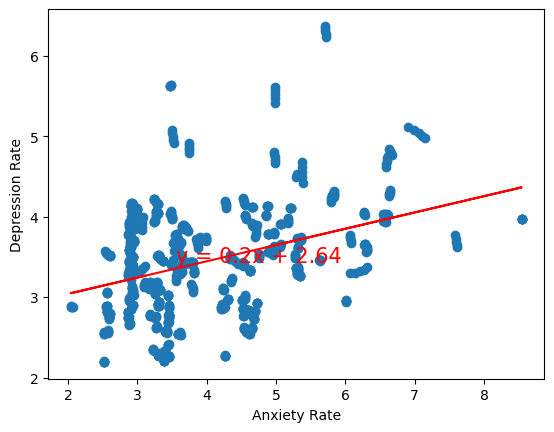

In [8]:
x_values = anx_depr_df["Anxiety disorders (%)"]
y_values = anx_depr_df["Depression (%)"]
plt.xlabel('Anxiety Rate')
plt.ylabel('Depression Rate')
regression_plot(x_values, y_values)

In [9]:
#Sort by population to take the top 5 and bottom 5 countries
by_population_df = mental_health_df.sort_values('Population', ascending = False).loc[mental_health_df['Year'] == 2017].loc[mental_health_df['Entity']!= 'World']



In [10]:
largest_countries = by_population_df.nlargest(5, 'Population')['Entity'].tolist()
smallest_countries = by_population_df.nsmallest(5, 'Population')['Entity'].tolist()
print(largest_countries)
print(smallest_countries)


['China', 'India', 'United States', 'Indonesia', 'Pakistan']
['Greenland', 'American Samoa', 'Northern Mariana Islands', 'Marshall Islands', 'Bermuda']


In [11]:
largest_countries_df = mental_health_df[mental_health_df['Entity'].isin(largest_countries)]
smallest_countries_df = mental_health_df[mental_health_df['Entity'].isin(smallest_countries)]


In [12]:
largest_smallest_df = pd.concat([smallest_countries_df, largest_countries_df])
largest_smallest_df = largest_smallest_df.loc[largest_smallest_df['Year'] > 2012]
largest_countries_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
1260,1260.0,China,CHN,1990.0,0.318924,0.314535,0.085918,3.128626,1.147397,3.573966,0.981807,38598188.32,1.176884e+09
1261,1261.0,China,CHN,1991.0,0.319391,0.314987,0.087021,3.132286,1.155388,3.572288,1.006175,39215086.26,1.192897e+09
1262,1262.0,China,CHN,1992.0,0.319878,0.315466,0.088183,3.137312,1.161280,3.568730,1.030312,39793762.52,1.206711e+09
1263,1263.0,China,CHN,1993.0,0.320381,0.315961,0.089405,3.143258,1.165176,3.562113,1.052846,40337743.48,1.218817e+09
1264,1264.0,China,CHN,1994.0,0.320883,0.316452,0.090790,3.149544,1.167726,3.551869,1.072373,40875753.03,1.230020e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,6099.0,United States,USA,2013.0,0.336404,0.652479,0.528946,6.671047,3.110712,4.772422,2.005814,14854640.94,3.164010e+08
6100,6100.0,United States,USA,2014.0,0.335860,0.652195,0.525990,6.660473,3.181115,4.782222,2.011345,15000147.28,3.186730e+08
6101,6101.0,United States,USA,2015.0,0.335243,0.651890,0.522109,6.650662,3.262674,4.795954,2.018738,15155130.94,3.208780e+08
6102,6102.0,United States,USA,2016.0,0.334578,0.651569,0.517728,6.642099,3.353142,4.813114,2.028263,15321682.16,3.230160e+08


The r-squared is: 0.06784554310468721


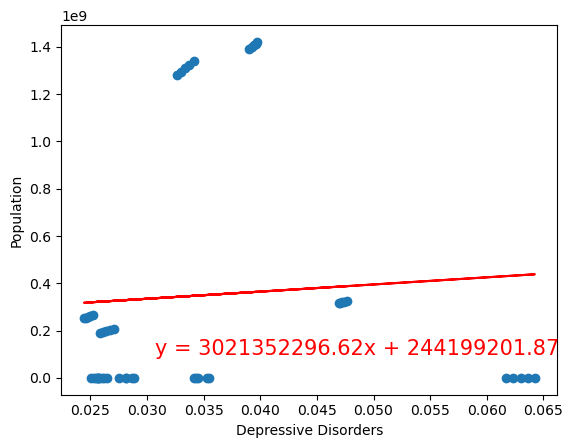

In [13]:
x_values = (largest_smallest_df['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)']/largest_smallest_df['Population'])
y_values = largest_smallest_df['Population']
plt.xlabel('Depressive Disorders')
plt.ylabel('Population')
regression_plot(x_values, y_values)

There appears to be no statistically significant correlation between population and the rate of appearance of depressive disorders. 

In [14]:


indicator_code = "NY.GNP.PCAP.CD"
year = "2017"
country_gni = {}
for country_code in country_codes:
    try: 
        url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?date={year}&format=json"
        response = requests.get(url)
        data = response.json()
        value = data[1][0]['value']
        print(f"Value for {country_code}: {value}")
        print()
        country_gni[country_code] = value
    except:
        print('Not found')

Value for AFG: 540

Value for ALB: 4290

Value for DZA: 3970

Value for ASM: None

Value for AND: None

Value for AGO: 1980

Value for ATG: 15000

Value for ARG: 13140

Value for ARM: 4070

Value for AUS: 51490

Value for AUT: 45040

Value for AZE: 4110

Value for BHS: 29260

Value for BHR: 21790

Value for BGD: 1650

Value for BRB: 16490

Value for BLR: 5320

Value for BEL: 42520

Value for BLZ: 5520

Value for BEN: 1050

Value for BMU: 112940

Value for BTN: 2760

Value for BOL: 3020

Value for BIH: 4990

Value for BWA: 5850

Value for BRA: 8670

Value for BRN: 29400

Value for BGR: 7610

Value for BFA: 650

Value for BDI: 250

Value for KHM: 1260

Value for CMR: 1400

Value for CAN: 42900

Value for CPV: 2930

Value for CAF: 400

Value for TCD: 640

Value for CHL: 13340

Value for CHN: 8670

Value for COL: 6010

Value for COM: 1370

Value for COG: 1640

Value for CRI: 11400

Value for CIV: 2000

Value for HRV: 13030

Value for CUB: 7950

Value for CYP: 25050

Value for CZE: 18310

V

In [26]:
country_gni_df= pd.DataFrame.from_dict(country_gni, orient='index', columns=['GNI per capita'])
country_gni_df.index.names = ['Code']
country_gni_df.head()

,GNI per capita
Code,
AFG,540.0
ALB,4290.0
DZA,3970.0
ASM,NaN
AND,NaN


In [28]:
depr_2017_df = anx_depr_df.loc[anx_depr_df['Year']== 2017]
depr_2017_df.head()
gni_depr_df = pd.merge(country_gni_df, depr_2017_df, on = 'Code')
gni_depr_df.head()

,Code,GNI per capita,Entity,Year,Anxiety disorders (%),Depression (%),Population
0,AFG,540.0,Afghanistan,2017.0,4.882481,4.136347,36296000.0
1,ALB,4290.0,Albania,2017.0,3.385245,2.208414,2884000.0
2,DZA,3970.0,Algeria,2017.0,5.065876,3.661094,41389000.0
3,ASM,NaN,American Samoa,2017.0,3.315834,2.939668,56000.0
4,AND,NaN,Andorra,2017.0,5.305375,3.729532,77000.0


In [31]:
gni_depr_df.dropna(axis = 0, how = 'any', inplace = True)

The r-squared is: 0.12939448356255617


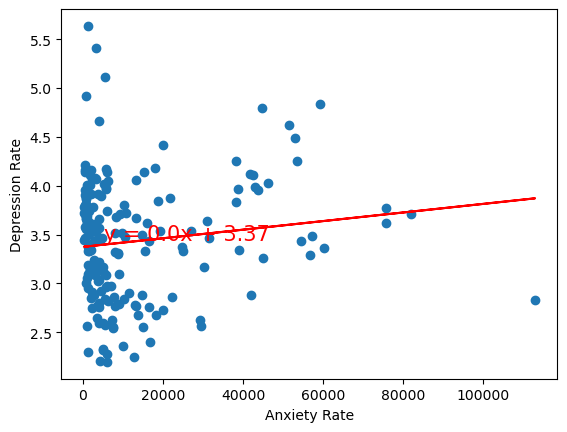

In [32]:
x_values = gni_depr_df['GNI per capita']
y_values = gni_depr_df['Depression (%)']
plt.xlabel('Anxiety Rate')
plt.ylabel('Depression Rate')
regression_plot(x_values, y_values)